# Customer Personality Analysis using Clustering

### 1. Problem Statement

#### Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. 

### 2. Importing Libraries

In [1]:
#!pip install yellowbrick

In [2]:
import numpy as np 
import pandas as pd 
import yellowbrick

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# from yellowbrick.cluster import KElbowVisualizer

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 3.Importing Dataset

In [4]:
df_customer = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\abcd\marketing_campaign.csv', sep = '\t')

In [5]:
df_customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 4.Data Exploration and Cleaning

#### Top 10 rows

In [6]:
df_customer.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


#### rows &columns

In [7]:
df_customer.shape

(2240, 29)

#### Getting datatypes

In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Checking null values count

In [9]:
df_customer.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Changing formate of Datetime

In [10]:
df_customer['Dt_Customer'] = pd.to_datetime(df_customer['Dt_Customer'], dayfirst = True)
df_customer.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

#### filling nulls in Income feature

In [11]:
df_customer['Income'].mode()

0    7500.0
Name: Income, dtype: float64

In [12]:
df_customer['Income'].fillna(df_customer['Income'].mode()[0], inplace= True)

In [13]:
df_customer.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
df_customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,51767.816518,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25458.285477,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### changing column names for better understanding

In [15]:
df_customer.rename(columns = {
    'Year_Birth' : 'birth_year',
    'Education' : 'education',
    'Marital_Status' : 'marital_status',
    'Income' : 'income',
    'Kidhome' : 'kids',
    'Teenhome' : 'teens',
    'Dt_Customer' : 'enrollment_date', 
    'Recency' : 'days_since_last_purchase',
    'MntWines' : 'spent_on_wines',
    'MntFruits' : 'spent_on_fruits',
    'MntMeatProducts' : 'spent_on_meat',
    'MntFishProducts' : 'spent_on_fish',
    'MntSweetProducts' : 'spent_on_sweet',
    'MntGoldProds' : 'spent_on_gold',
    'NumDealsPurchases' : 'purchases_with_discount', 
    'NumWebPurchases' : 'web_purchase',
    'NumCatalogPurchases' : 'catalog_purchase', 
    'NumStorePurchases' : 'store_purchase', 
    'NumWebVisitsMonth' : 'website_visit_last_month',
    'AcceptedCmp3' : 'campaign3',
    'AcceptedCmp4' : 'campaign4', 
    'AcceptedCmp5': 'campaign5', 
    'AcceptedCmp1': 'campaign1',
    'AcceptedCmp2' : 'campaign2',
    'Complain' : 'complain',
    'Response' : 'last_campaign'
}, inplace = True)

df_customer.columns

Index(['ID', 'birth_year', 'education', 'marital_status', 'income', 'kids',
       'teens', 'enrollment_date', 'days_since_last_purchase',
       'spent_on_wines', 'spent_on_fruits', 'spent_on_meat', 'spent_on_fish',
       'spent_on_sweet', 'spent_on_gold', 'purchases_with_discount',
       'web_purchase', 'catalog_purchase', 'store_purchase',
       'website_visit_last_month', 'campaign3', 'campaign4', 'campaign5',
       'campaign1', 'campaign2', 'complain', 'Z_CostContact', 'Z_Revenue',
       'last_campaign'],
      dtype='object')

In [16]:
df_customer.head()

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 5.EDA

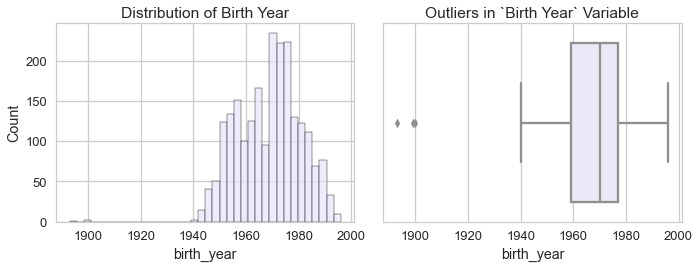

In [17]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['birth_year'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Birth Year')

sns.boxplot(df_customer['birth_year'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `Birth Year` Variable')

plt.tight_layout()

#### hist and box plots for birth year

In [18]:
q1 = df_customer['birth_year'].quantile(.25)
q3 = df_customer['birth_year'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['birth_year'] < (q1 - 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


#### There are only 3 outliers present in the birth_year column. This suggests that the company have elderly customers as well.

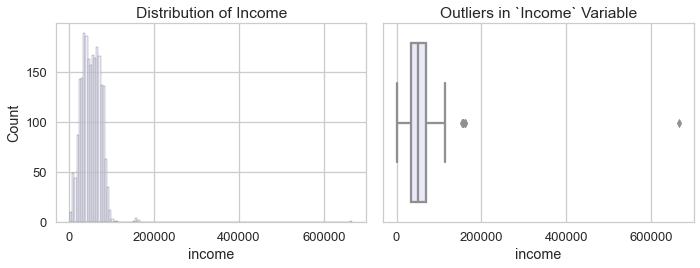

In [19]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['income'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Income')

sns.boxplot(df_customer['income'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `Income` Variable')

plt.tight_layout()

#### checking outliers for income column

In [20]:
q1 = df_customer['income'].quantile(.25)
q3 = df_customer['income'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['income'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


#### There are 8 outliers present which have relatvely high income than the rest.

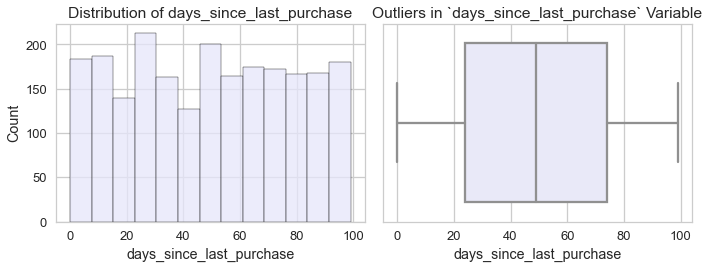

In [21]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['days_since_last_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of days_since_last_purchase')

sns.boxplot(df_customer['days_since_last_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `days_since_last_purchase` Variable')

plt.tight_layout()

#### checking outliers in days_since_last_purchase column

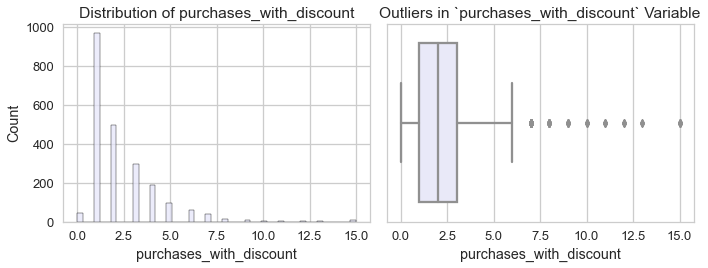

In [22]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.histplot(df_customer['purchases_with_discount'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of purchases_with_discount')

sns.boxplot(df_customer['purchases_with_discount'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `purchases_with_discount` Variable')

plt.tight_layout()

In [23]:
q1 = df_customer['purchases_with_discount'].quantile(.25)
q3 = df_customer['purchases_with_discount'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['purchases_with_discount'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,3,11,0
24,1409,1951,Graduation,Together,40689.0,0,1,2013-03-18,69,270,...,8,0,0,0,0,0,0,3,11,0
49,6566,1954,PhD,Married,72550.0,1,1,2012-11-08,39,826,...,8,0,0,0,0,0,0,3,11,0
54,9381,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,...,3,0,0,0,0,0,0,3,11,0
69,1357,1970,Graduation,Together,74854.0,1,2,2013-04-08,90,856,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,4865,1974,Master,Divorced,53367.0,1,1,2013-08-31,2,229,...,7,0,0,0,0,0,0,3,11,1
2144,5136,1973,Graduation,Single,65333.0,0,1,2014-01-17,58,654,...,6,0,1,1,0,0,0,3,11,0
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,3,11,1
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,8,0,0,0,0,0,0,3,11,0


#### we have 86 outliers in purchases_with_discount column

In [24]:
q1 = df_customer['purchases_with_discount'].quantile(.25)
q3 = df_customer['purchases_with_discount'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['purchases_with_discount'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,3,11,0
24,1409,1951,Graduation,Together,40689.0,0,1,2013-03-18,69,270,...,8,0,0,0,0,0,0,3,11,0
49,6566,1954,PhD,Married,72550.0,1,1,2012-11-08,39,826,...,8,0,0,0,0,0,0,3,11,0
54,9381,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,...,3,0,0,0,0,0,0,3,11,0
69,1357,1970,Graduation,Together,74854.0,1,2,2013-04-08,90,856,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,4865,1974,Master,Divorced,53367.0,1,1,2013-08-31,2,229,...,7,0,0,0,0,0,0,3,11,1
2144,5136,1973,Graduation,Single,65333.0,0,1,2014-01-17,58,654,...,6,0,1,1,0,0,0,3,11,0
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,3,11,1
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,8,0,0,0,0,0,0,3,11,0


#### Most people have made purchases with a discount between 1 to 6 times. However, there are 84 outliers who have made purchases with a discount 7 times or more.

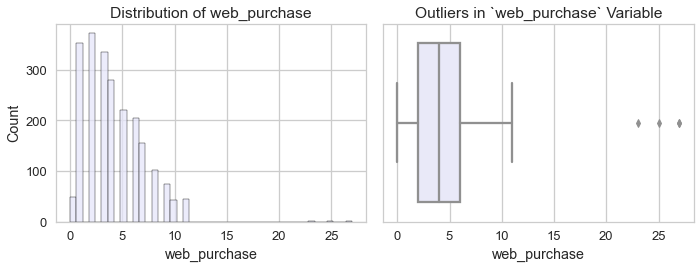

In [25]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['web_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of web_purchase')

sns.boxplot(df_customer['web_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `web_purchase` Variable')

plt.tight_layout()

In [26]:
q1 = df_customer['web_purchase'].quantile(.25)
q3 = df_customer['web_purchase'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['web_purchase'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
27,5255,1986,Graduation,Single,7500.0,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
1806,6237,1966,PhD,Single,7144.0,0,2,2013-12-07,92,81,...,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,1,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,1,0,0,0,0,0,0,3,11,0


#### The majority of web purchases fall within the range of 0 to 12, with only 3 outliers.

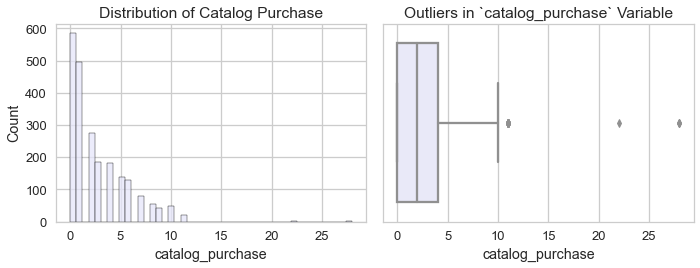

In [27]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['catalog_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Catalog Purchase')

sns.boxplot(df_customer['catalog_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `catalog_purchase` Variable')

plt.tight_layout()

In [28]:
q1 = df_customer['catalog_purchase'].quantile(.25)
q3 = df_customer['catalog_purchase'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['catalog_purchase'] > (q3 + 1.5 * iqr)]

outlier['catalog_purchase'].value_counts()

11    19
28     3
22     1
Name: catalog_purchase, dtype: int64

#### The majority of catalog purchases fall within the range of 0 to 10, with only 23 observations where the number of catalog purchases exceeds 10.

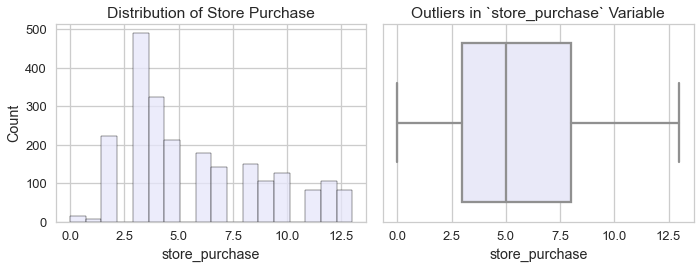

In [29]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['store_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Store Purchase')

sns.boxplot(df_customer['store_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `store_purchase` Variable')

plt.tight_layout()

#### The number of store purchases falls within the range of 0 to 13, and there are no outliers for this variable.

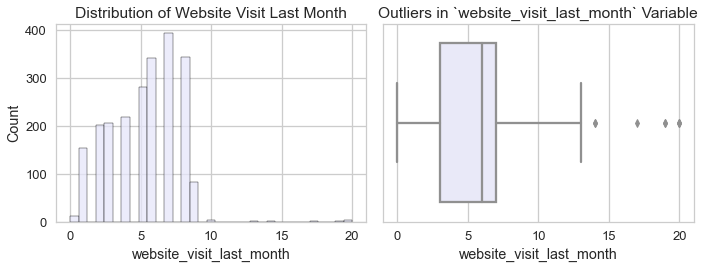

In [30]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['website_visit_last_month'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Website Visit Last Month')

sns.boxplot(df_customer['website_visit_last_month'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `website_visit_last_month` Variable')

plt.tight_layout()

In [31]:
q1 = df_customer['website_visit_last_month'].quantile(.25)
q3 = df_customer['website_visit_last_month'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['website_visit_last_month'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107,...,20,0,0,0,0,0,0,3,11,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,14,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,20,0,0,0,0,0,0,3,11,0
1328,4246,1982,Master,Single,6560.0,0,0,2013-12-12,2,67,...,17,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,19,0,0,0,0,0,0,3,11,0


#### The majority of website visits last month are in the range of 0 to 9, with 8 outlier observations having more than 16 visits on the website last month.

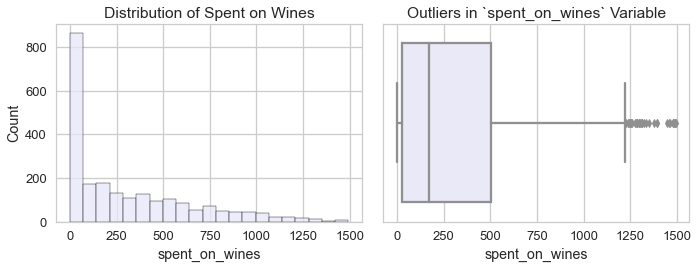

In [32]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_wines'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Wines')

sns.boxplot(df_customer['spent_on_wines'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_wines` Variable')

plt.tight_layout()

In [33]:
q1 = df_customer['spent_on_wines'].quantile(.25)
q3 = df_customer['spent_on_wines'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_wines'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
111,7431,1991,PhD,Single,68126.0,0,0,2012-11-10,40,1332,...,9,0,1,0,0,0,0,3,11,1
161,9260,1945,PhD,Married,70356.0,0,0,2012-11-05,20,1349,...,6,0,0,0,0,0,0,3,11,0
295,2926,1952,Master,Together,55951.0,0,1,2012-08-23,62,1241,...,8,0,1,0,0,1,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,2,0,0,1,0,0,0,3,11,0
430,3725,1961,PhD,Single,84865.0,0,0,2013-05-09,1,1248,...,4,0,1,1,1,1,0,3,11,1
466,7999,1955,PhD,Together,75261.0,0,0,2013-04-23,17,1239,...,2,0,1,1,0,0,0,3,11,1
497,11088,1971,PhD,Together,78642.0,0,1,2013-04-21,83,1396,...,6,0,0,0,0,0,0,3,11,0
515,203,1975,Master,Single,81169.0,0,0,2013-04-14,47,1288,...,2,0,0,0,0,0,0,3,11,0
523,4943,1953,Graduation,Married,70503.0,0,0,2012-09-30,73,1379,...,6,0,1,1,0,0,0,3,11,0
543,5547,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,...,3,0,1,1,0,0,0,3,11,1


#### The data is highly skewed to the right, indicating that the majority of people either don't drink wine or prefer to purchase it from other sources. Only 35 customers have spent more than $1000 on wine.

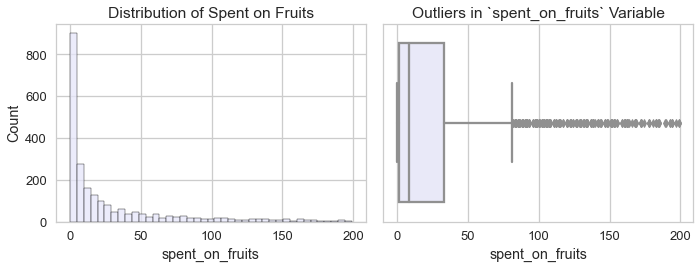

In [34]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_fruits'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Fruits')

sns.boxplot(df_customer['spent_on_fruits'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_fruits` Variable')

plt.tight_layout()

In [35]:
q1 = df_customer['spent_on_fruits'].quantile(.25)
q3 = df_customer['spent_on_fruits'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_fruits'] > (q3 + 1.5 * iqr)]
outlier['spent_on_fruits']

0        88
29      100
45      164
53      120
72      107
       ... 
2172    155
2185    142
2203    124
2206    129
2217    194
Name: spent_on_fruits, Length: 227, dtype: int64

#### The majority of customers have spent less than $60 on fruits.

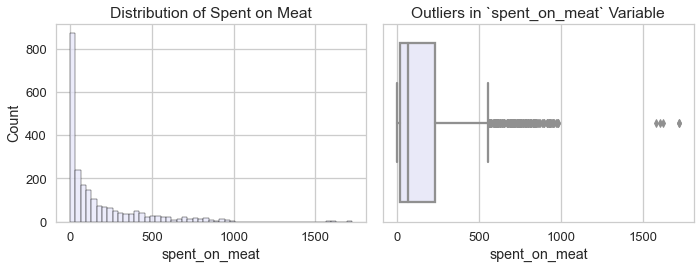

In [36]:
df_customer.columns

fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_meat'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Meat')

sns.boxplot(df_customer['spent_on_meat'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_meat` Variable')

plt.tight_layout()

In [37]:
q1 = df_customer['spent_on_meat'].quantile(.25)
q3 = df_customer['spent_on_meat'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_meat'] > (q3 + 1.5 * iqr)]
outlier['spent_on_meat']

21      1725
29       801
51       780
76       925
77       779
        ... 
2190     655
2193     845
2211     860
2213     631
2228    1607
Name: spent_on_meat, Length: 175, dtype: int64

#### The majority of customers have spent less than $1000 on meat.

Text(0.5, 1.0, 'Outliers in `spent_on_fish` Variable')

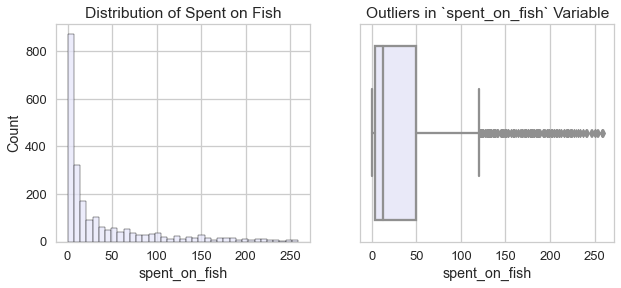

In [38]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_fish'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Fish')

sns.boxplot(df_customer['spent_on_fish'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_fish` Variable')

In [39]:
q1 = df_customer['spent_on_fish'].quantile(.25)
q3 = df_customer['spent_on_fish'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_fish'] > (q3 + 1.5 * iqr)]
outlier['spent_on_fish']

0       172
12      225
17      150
39      160
45      227
       ... 
2188    199
2190    145
2193    202
2206    182
2217    149
Name: spent_on_fish, Length: 223, dtype: int64

#### The majority of customers have spent less than $250 on fish.

Text(0.5, 1.0, 'Outliers in `spent_on_sweet` Variable')

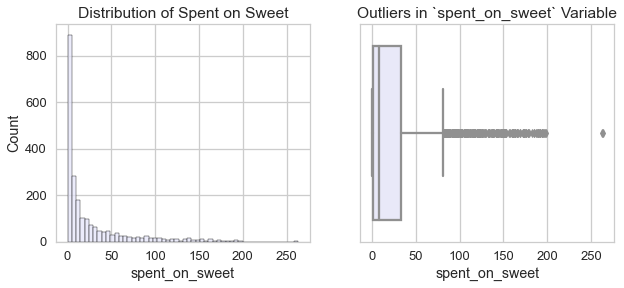

In [40]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_sweet'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Sweet')

sns.boxplot(df_customer['spent_on_sweet'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_sweet` Variable')

In [41]:
q1 = df_customer['spent_on_sweet'].quantile(.25)
q3 = df_customer['spent_on_sweet'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_sweet'] > (q3 + 1.5 * iqr)]
outlier['spent_on_sweet']

0        88
12      112
27      263
40      178
51      167
       ... 
2175     92
2190    111
2193    133
2217    125
2235    118
Name: spent_on_sweet, Length: 248, dtype: int64

#### The majority of customers have spent less than $200 on Sweet.

Text(0.5, 1.0, 'Outliers in `spent_on_gold Variable')

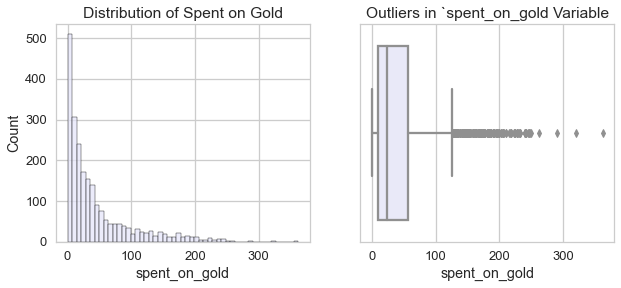

In [42]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_gold'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Gold')

sns.boxplot(df_customer['spent_on_gold'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_gold Variable')

In [43]:
q1 = df_customer['spent_on_gold'].quantile(.25)
q3 = df_customer['spent_on_gold'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_gold'] > (q3 + 1.5 * iqr)]
outlier['spent_on_gold']

18      176
27      362
45      174
53      241
55      190
       ... 
2178    227
2188    163
2194    174
2198    152
2235    247
Name: spent_on_gold, Length: 207, dtype: int64

#### The majority of customers have spent less than $400 on Gold.

In [44]:
round(df_customer['complain'].value_counts(normalize = True)*100,2)

0    99.06
1     0.94
Name: complain, dtype: float64

#### The company received 0.95% complain from its customers in the last 2 years, which is a very good score.

In [45]:
round(df_customer['kids'].value_counts(normalize = True)*100,2)

0    57.72
1    40.13
2     2.14
Name: kids, dtype: float64

In [46]:
round(df_customer['teens'].value_counts(normalize = True)*100,2)

0    51.70
1    45.98
2     2.32
Name: teens, dtype: float64

In [47]:
round(df_customer['campaign1'].value_counts(normalize = True)*100,2)

0    93.57
1     6.43
Name: campaign1, dtype: float64

In [48]:
round(df_customer['campaign2'].value_counts(normalize = True)*100,2)

0    98.66
1     1.34
Name: campaign2, dtype: float64

In [49]:
round(df_customer['campaign3'].value_counts(normalize = True)*100,2)

0    92.72
1     7.28
Name: campaign3, dtype: float64

In [50]:
round(df_customer['campaign4'].value_counts(normalize = True)*100,2)

0    92.54
1     7.46
Name: campaign4, dtype: float64

In [51]:
round(df_customer['campaign5'].value_counts(normalize = True)*100,2)

0    92.72
1     7.28
Name: campaign5, dtype: float64

In [52]:
round(df_customer['last_campaign'].value_counts(normalize = True)*100,2)

0    85.09
1    14.91
Name: last_campaign, dtype: float64

#### The total percentage of customers who made purchases across all six campaigns is 44.86%.

First campaign: 6.41%
Second campaign: 1.35%
Third campaign: 7.36%
Fourth campaign: 7.4%
Fifth campaign: 7.31%
Sixth campaign: 15.03%

In [53]:
df_customer['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [54]:
df_customer['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

#### The variables Z_CostContact and Z_Revenue each contain only a single value throughout their respective columns. As a result, they do not contribute any valuable insights to our analysis. Consequently, we can safely eliminate these variables from our dataset along with the ID variable.

In [55]:
df_customer = df_customer.drop(columns = ['Z_CostContact', 'Z_Revenue', 'ID'], axis = 1)

#### adding all wanted columns and create a new DF for counts of each column

In [56]:
wine_purchase = df_customer[df_customer['spent_on_wines'] != 0]
fruit_purchase =  df_customer[df_customer['spent_on_fruits'] != 0]
meat_purchase =  df_customer[df_customer['spent_on_meat'] != 0]
fish_purchase =  df_customer[df_customer['spent_on_fish'] != 0]
sweets_purchase =  df_customer[df_customer['spent_on_sweet'] != 0]
gold_purchase =  df_customer[df_customer['spent_on_gold'] != 0]

In [57]:
category_purchase = pd.DataFrame({
    'wine_purchase' : wine_purchase['spent_on_wines'],
    'fruit_purchase' : fruit_purchase['spent_on_fruits'],
    'meat_purchase' : meat_purchase['spent_on_meat'],
    'fish_purchase' : fish_purchase['spent_on_fish'],
    'sweets_purchase' : sweets_purchase['spent_on_sweet'],
    'gold_purchase' : gold_purchase['spent_on_sweet']
})

In [58]:
total_purchase = category_purchase.agg({
    'wine_purchase' : 'count',
    'fruit_purchase' : 'count',
    'meat_purchase' : 'count',
    'fish_purchase' : 'count',
    'sweets_purchase' : 'count',
    'gold_purchase': 'count'
}).sort_values(ascending = False)

#### Total spend count wise plot

Text(0.5, 1.0, 'Customer Purchases by Item Category')

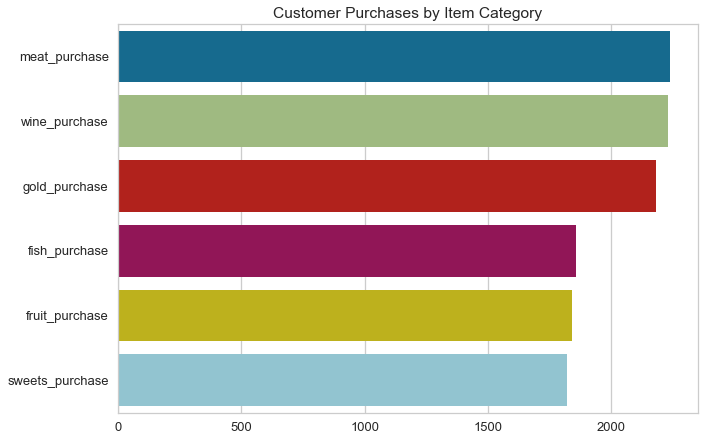

In [59]:
sns.barplot(x = total_purchase,y = total_purchase.index)
plt.title('Customer Purchases by Item Category')

#### Total money spent on various items offered by the company

#### Total money spend Sum wise plot

In [60]:
total_spent = df_customer.agg({
    'spent_on_wines' : 'sum',
    'spent_on_fruits' : 'sum',
    'spent_on_meat' : 'sum',
    'spent_on_fish' : 'sum',
    'spent_on_sweet' : 'sum',
    'spent_on_gold': 'sum'
}).sort_values(ascending = False)

Text(0.5, 1.0, 'Total Customer Expenditure by Item Category')

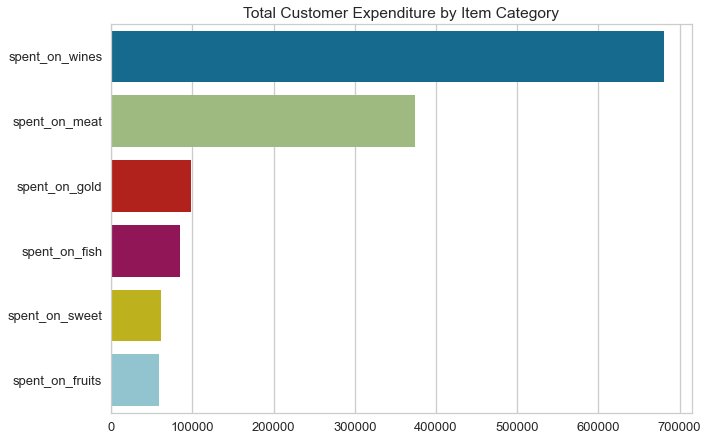

In [61]:
sns.barplot(x = total_spent,y = total_spent.index)
plt.title('Total Customer Expenditure by Item Category')

#### The number of items sold and the total amount spent for each category yield similar results, with meat being the top-selling item and wine leading in sales.

## 6.Feature Transformation/Extraction

#### adding new columns from datetime

In [62]:
df_customer['enrollment_year'] = df_customer['enrollment_date'].dt.year
df_customer['enrollment_month'] = df_customer['enrollment_date'].dt.month_name()

# creating custom columns 'total_spent', 'age', 'age_group', 'income_range'
df_customer['total_spent'] = df_customer['spent_on_wines'] + df_customer['spent_on_fruits'] + df_customer['spent_on_meat'] + df_customer['spent_on_fish'] + df_customer['spent_on_sweet'] + df_customer['spent_on_gold']

# calculating the age according to the year '2014'
df_customer['age'] = 2014 - df_customer['birth_year']

df_customer['age_group'] = pd.cut(df_customer['age'], bins=[0, 25, 35, 50, 65, 130], labels=['19-25', '26-35', '36-50', '51-65', '65 -125'])

df_customer['income_range'] = pd.cut(df_customer['income'], bins=[0, 3000, 5000, 10000, 25000, 50000, 70000], labels=['0 - 3k', '3-5k', '5-10k', '10-25k', '25-50k', '50-70k'])

#### creating 'parent' column from kids and teens column

In [63]:
df_customer['children'] = df_customer['kids'] + df_customer['teens']

df_customer['parent'] = np.where(df_customer.children > 0,1,0)
df_customer['parent'].value_counts()

1    1602
0     638
Name: parent, dtype: int64

In [64]:
df_customer['campaign_purchase'] = df_customer['campaign1'] + df_customer['campaign2'] + df_customer['campaign3'] + df_customer['campaign4'] + df_customer['campaign5'] + df_customer['last_campaign']

df_customer['campaign_purchase'] = np.where(df_customer.campaign_purchase > 0, 1, 0)

round(df_customer['campaign_purchase'].value_counts(normalize = True)*100)

0    73.0
1    27.0
Name: campaign_purchase, dtype: float64

In [65]:
round(df_customer['enrollment_year'].value_counts(normalize = True)*100,1)

2013    53.1
2014    24.9
2012    22.1
Name: enrollment_year, dtype: float64

#### About 52.9% of the existing customers have enrolled in the year 2013, a figure greater than the combined enrollments in both 2012 and 2014.

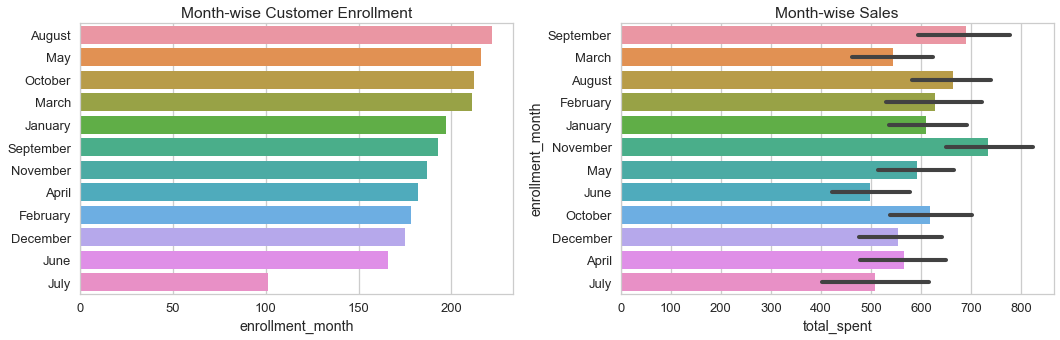

In [66]:
enrollment_month = df_customer['enrollment_month'].value_counts()

fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.barplot(y = enrollment_month.index,x = enrollment_month, ax = axes [0])
axes[0].set_title('Month-wise Customer Enrollment')

sns.barplot(data = df_customer, y ='enrollment_month', x = 'total_spent', ax = axes[1])
axes[1].set_title('Month-wise Sales')

plt.tight_layout()

#### All the months have approximately the same number of enrollments, except for June and July, which have very low enrollment counts.
The months with the highest number of sales are November, followed by September, August, and October.

In [67]:
df_customer.groupby(['enrollment_year', 'enrollment_month']).count()['income']

enrollment_year  enrollment_month
2012             August              118
                 December             83
                 July                  2
                 November             97
                 October              95
                 September            99
2013             April                88
                 August              104
                 December             92
                 February            100
                 January             107
                 July                 99
                 June                 92
                 March               102
                 May                 104
                 November             90
                 October             117
                 September            94
2014             April                94
                 February             78
                 January              90
                 June                 74
                 March               109
                 May   

#### For the year 2012, we have data for the last 6 months (July - December), and for 2014, we have data for the first 6 months (January - June). In contrast, for the year 2013, we have data for the entire year. This difference in data availability explains why there are fewer enrollments in the years 2012 and 2014.

In [68]:
df_customer.agg({
    'total_spent' : ['min', 'max', 'median'],
    'age' : ['min', 'max', 'median'],
})

,total_spent,age
min,5.0,18.0
max,2525.0,121.0
median,396.0,44.0


#### The maximum age of 121 is quite unusual, so we will conduct further investigation to better understand this data point.

In [69]:
df_customer[df_customer['age'] >= 80]

,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,spent_on_fruits,...,last_campaign,enrollment_year,enrollment_month,total_spent,age,age_group,income_range,children,parent,campaign_purchase
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,0,2013,September,65,114,65 -125,25-50k,1,1,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,0,2014,May,22,121,65 -125,50-70k,1,1,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,0,2013,September,1853,115,65 -125,NaN,0,0,1


#### Comparing the total amount spent with categorical variable.

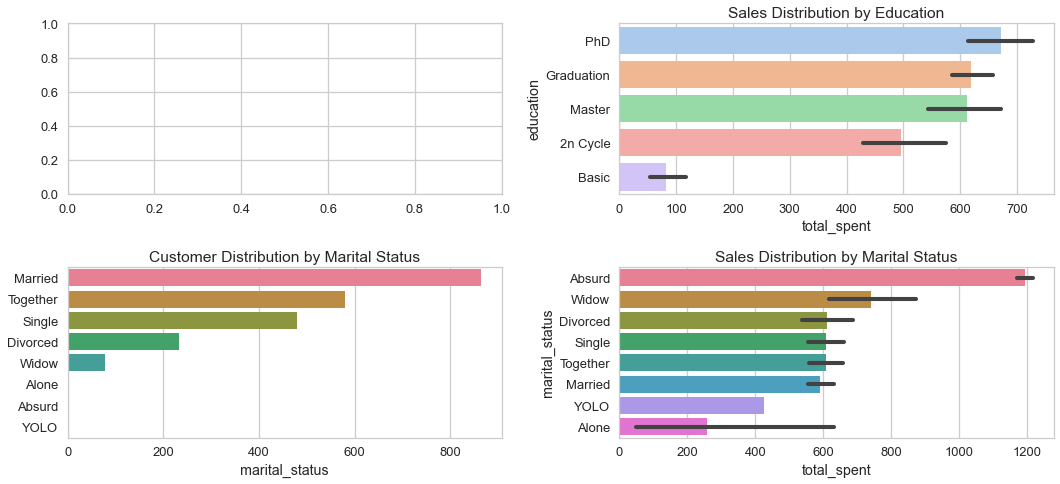

In [70]:
# education = df_customer['education'].value_counts()
marital_status = df_customer['marital_status'].value_counts()

fig, axes = plt.subplots(2,2, figsize = (15,7))

# sns.barplot(x = education,y = education.index, palette='husl', ax = axes[0,0])
# axes[0,0].set_title('Customer Distribution by education') 

sns.barplot(data = df_customer, y = 'education',x = 'total_spent', palette= 'pastel', ax = axes[0,1], order = ['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'])
axes[0,1].set_title('Sales Distribution by Education')

sns.barplot(x = marital_status,y = marital_status.index, palette='husl', ax = axes[1,0])
axes[1,0].set_title('Customer Distribution by Marital Status') 

sns.barplot(data = df_customer, y = 'marital_status',x = 'total_spent', palette='husl', ax = axes[1,1], order = ['Absurd', 'Widow', 'Divorced', 'Single', 'Together', 'Married','YOLO', 'Alone'])
axes[1,1].set_title('Sales Distribution by Marital Status')

plt.tight_layout()

In [71]:
round(df_customer['age_group'].value_counts(normalize = True)*100,2)

36-50      45.49
51-65      29.64
26-35      17.23
19-25       4.06
65 -125     3.57
Name: age_group, dtype: float64

#### More than 75% of the customers fall within the age range of 36 to 65.

In [72]:
round(df_customer['income_range'].value_counts(normalize = True)*100,2)

25-50k    47.23
50-70k    37.41
10-25k    12.30
5-10k      2.71
3-5k       0.23
0 - 3k     0.12
Name: income_range, dtype: float64

#### 85.83% of customers have an income within the range of 25,000 to 70,000.

In [73]:
df_customer.head()

,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,spent_on_fruits,...,last_campaign,enrollment_year,enrollment_month,total_spent,age,age_group,income_range,children,parent,campaign_purchase
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,1,2012,September,1617,57,51-65,50-70k,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,2014,March,27,60,51-65,25-50k,2,1,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,2013,August,776,49,36-50,NaN,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,2014,February,53,30,26-35,25-50k,1,1,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,2014,January,422,33,26-35,50-70k,1,1,0


#### Dropping the 'enrollment_date' column since we have already created two new variables from it, which will be used in our analysis.

In [74]:
customer_subset = df_customer.drop(columns = ['enrollment_date','birth_year', 'age_group', 'income_range', 'kids','teens', 'campaign1', 'campaign2', 'campaign3', 'campaign4', 'campaign5', 'last_campaign', 'children'], axis = 1)
customer_subset

,education,marital_status,income,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,spent_on_sweet,spent_on_gold,...,catalog_purchase,store_purchase,website_visit_last_month,complain,enrollment_year,enrollment_month,total_spent,age,parent,campaign_purchase
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,10,4,7,0,2012,September,1617,57,0,1
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,1,2,5,0,2014,March,27,60,1,0
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,2,10,4,0,2013,August,776,49,0,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,0,4,6,0,2014,February,53,30,1,0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,3,6,5,0,2014,January,422,33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,709,43,182,42,118,247,...,3,4,5,0,2013,June,1341,47,1,0
2236,PhD,Together,64014.0,56,406,0,30,0,0,8,...,2,5,7,0,2014,June,444,68,1,1
2237,Graduation,Divorced,56981.0,91,908,48,217,32,12,24,...,3,13,6,0,2014,January,1241,33,0,1
2238,Master,Together,69245.0,8,428,30,214,80,30,61,...,5,10,3,0,2014,January,843,58,1,0


In [75]:
customer_subset.columns

Index(['education', 'marital_status', 'income', 'days_since_last_purchase',
       'spent_on_wines', 'spent_on_fruits', 'spent_on_meat', 'spent_on_fish',
       'spent_on_sweet', 'spent_on_gold', 'purchases_with_discount',
       'web_purchase', 'catalog_purchase', 'store_purchase',
       'website_visit_last_month', 'complain', 'enrollment_year',
       'enrollment_month', 'total_spent', 'age', 'parent',
       'campaign_purchase'],
      dtype='object')

## 7.Label Encoding and Standardization

In [76]:
customer_subset['enrollment_month'] = customer_subset['enrollment_month'].map({
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6, 
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12 
})

In [77]:
customer_subset['enrollment_month'].value_counts().sort_index()

1     197
2     178
3     211
4     182
5     216
6     166
7     101
8     222
9     193
10    212
11    187
12    175
Name: enrollment_month, dtype: int64

#### delect dummies to avoid multicolinearity

In [78]:
customer_subset = pd.get_dummies(customer_subset, drop_first = True, columns = ['marital_status','education'])
customer_subset

,income,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,spent_on_sweet,spent_on_gold,purchases_with_discount,web_purchase,...,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,education_Basic,education_Graduation,education_Master,education_PhD
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,1,0,0,0,1,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,1,0,0,0,0,0,1,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,0,0,1,0,0,0,0,0,1
2237,56981.0,91,908,48,217,32,12,24,1,2,...,1,0,0,0,0,0,0,1,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,0,1,0,0,0,0,1,0


## 8.Model Building - K-Means

In [79]:
X = customer_subset
X.columns

Index(['income', 'days_since_last_purchase', 'spent_on_wines',
       'spent_on_fruits', 'spent_on_meat', 'spent_on_fish', 'spent_on_sweet',
       'spent_on_gold', 'purchases_with_discount', 'web_purchase',
       'catalog_purchase', 'store_purchase', 'website_visit_last_month',
       'complain', 'enrollment_year', 'enrollment_month', 'total_spent', 'age',
       'parent', 'campaign_purchase', 'marital_status_Alone',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Together',
       'marital_status_Widow', 'marital_status_YOLO', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD'],
      dtype='object')

In [80]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.25027631,  0.30703926,  0.98378127, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [-0.21309477, -0.38366418, -0.87047948, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.77969173, -0.79808624,  0.36272278, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       ...,
       [ 0.20481927,  1.44669994,  1.79502034, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.68665606, -1.41971934,  0.36866592, ..., -1.00626965,
         2.24812234, -0.5263848 ],
       [ 0.04326408, -0.31459383, -0.65355475, ..., -1.00626965,
        -0.44481565,  1.8997509 ]])

In [81]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

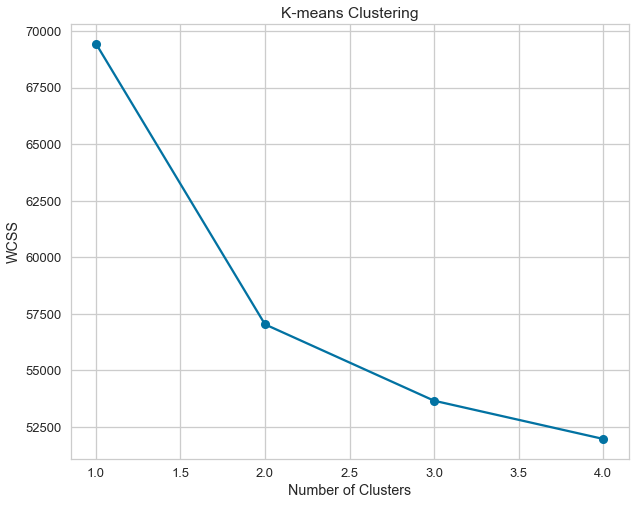

In [82]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

#### Ok, 2 is the best clustering based on elbow method

In [83]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
label = kmeans.predict(X_scaled)

In [84]:
data_segment = customer_subset.copy()
data_segment['Segments'] = label

#### Now, let’s look at the people’s characteristics in each cluster

In [85]:
data_segment.groupby(['Segments']).mean()

,income,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,spent_on_sweet,spent_on_gold,purchases_with_discount,web_purchase,...,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,education_Basic,education_Graduation,education_Master,education_PhD
Segments,,,,,,,,,,,,,,,,,,,,,
0,39142.551948,48.498557,112.826118,7.043290,39.321068,10.212843,7.036075,23.576479,2.554113,3.052670,...,0.097403,0.397547,0.213564,0.259740,0.028139,0.001443,0.038240,0.485570,0.175325,0.203463
1,72258.000000,50.100703,614.097190,57.558548,374.085480,81.852459,59.565574,77.203747,1.953162,5.759953,...,0.113583,0.366511,0.215457,0.257611,0.044496,0.000000,0.001171,0.531616,0.148712,0.238876


### Segment 0 (few opportunities) = Lower income, have more kids, higher deals purchase, higher web visits, low expense, low accepted campaign

### Segment 1 (well-off) = Higher income, less kids, high web, catalog, and store purchases, high expense, higher accepted campaign

#### Lableing it

In [86]:
data_segment['Labels'] = data_segment['Segments'].map({1:'well-off',
0:'fewer-opportunities'})

In [87]:
data_segment

,income,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,spent_on_fish,spent_on_sweet,spent_on_gold,purchases_with_discount,web_purchase,...,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,education_Basic,education_Graduation,education_Master,education_PhD,Segments,Labels
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,0,0,0,0,1,0,0,1,well-off
1,46344.0,38,11,1,6,2,1,6,2,1,...,1,0,0,0,0,1,0,0,0,fewer-opportunities
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,1,0,0,0,1,0,0,1,well-off
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,1,0,0,0,1,0,0,0,fewer-opportunities
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,0,0,1,0,fewer-opportunities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,0,0,0,1,0,0,1,well-off
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,1,0,0,0,0,0,1,0,fewer-opportunities
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,0,0,0,1,0,0,1,well-off
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,1,0,0,0,0,1,0,1,well-off


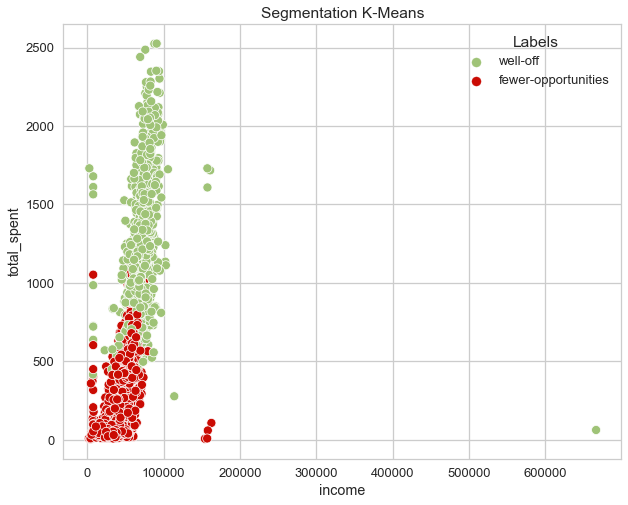

In [88]:
plt.figure(figsize = (10,8))
sns.scatterplot(data_segment['income'], data_segment['total_spent'], hue = data_segment['Labels'], palette= ['g','r'])
plt.title('Segmentation K-Means')
plt.show()

## 9.Conclusion

### The clustering is mostly based on income, expenses, number of purchases by it’s category, and total accepted campaign. Education level, marital status, and age did not affect the clustering. So, there are 2 segmentations which is the best number of clustering based on the model. Segment 0 which the customers had low income and low expenses. Segment 1 which the customers had high income and high expenses, which is better to focus on.

## 10.Finding coefficients of each column for statistical analysis using LASSO Regression (Regularization): 

In [89]:
import numpy as np   
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in data_segment:
    data_segment[feat] = le.fit_transform(data_segment[feat].astype(str))

print (data_segment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   income                    2240 non-null   int32
 1   days_since_last_purchase  2240 non-null   int32
 2   spent_on_wines            2240 non-null   int32
 3   spent_on_fruits           2240 non-null   int32
 4   spent_on_meat             2240 non-null   int32
 5   spent_on_fish             2240 non-null   int32
 6   spent_on_sweet            2240 non-null   int32
 7   spent_on_gold             2240 non-null   int32
 8   purchases_with_discount   2240 non-null   int32
 9   web_purchase              2240 non-null   int32
 10  catalog_purchase          2240 non-null   int32
 11  store_purchase            2240 non-null   int32
 12  website_visit_last_month  2240 non-null   int32
 13  complain                  2240 non-null   int32
 14  enrollment_year           2240 non-null 

In [91]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_final=sc.fit_transform(data_segment)
scaled_final

array([[ 0.31037593,  0.17375818,  0.97860104, ..., -0.5263848 ,
         1.27395087,  1.27395087],
       [-0.28620016, -0.58421323, -1.42301557, ..., -0.5263848 ,
        -0.78495963, -0.78495963],
       [ 1.01192142, -1.03210542,  0.20269413, ..., -0.5263848 ,
         1.27395087,  1.27395087],
       ...,
       [ 0.2456448 ,  1.44852827,  1.74527096, ..., -0.5263848 ,
         1.27395087,  1.27395087],
       [ 0.87721069,  1.00063608,  0.20731263, ..., -0.5263848 ,
         1.27395087,  1.27395087],
       [ 0.02695855, -0.48085349,  1.59286067, ...,  1.8997509 ,
        -0.78495963, -0.78495963]])

In [92]:
X= data_segment.drop('Labels',axis=1)

In [93]:
Y = data_segment['Labels']

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=None)

In [109]:
lasso = Lasso(alpha=0.1)
model = lasso.fit(X_train,Y_train)
coeffecients =[]
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,model.coef_[i]))

Lasso model coefficients for income is 0.0003667186162710846:
Lasso model coefficients for days_since_last_purchase is -0.0:
Lasso model coefficients for spent_on_wines is 0.00010406288753402553:
Lasso model coefficients for spent_on_fruits is 0.0005373992645535916:
Lasso model coefficients for spent_on_meat is -0.00023536034561172893:
Lasso model coefficients for spent_on_fish is 0.000136383257655532:
Lasso model coefficients for spent_on_sweet is 0.00030301780498630856:
Lasso model coefficients for spent_on_gold is 8.603270546624558e-05:
Lasso model coefficients for purchases_with_discount is -0.004541609351485784:
Lasso model coefficients for web_purchase is 0.0:
Lasso model coefficients for catalog_purchase is 0.04443321236602008:
Lasso model coefficients for store_purchase is -0.009079917537687419:
Lasso model coefficients for website_visit_last_month is -0.002495649421256289:
Lasso model coefficients for complain is 0.0:
Lasso model coefficients for enrollment_year is -0.0:
Lasso

In [96]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.7124171115633768
0.6840609290799633


## Hyperparameter tuning using GridsearchCV

In [97]:
from sklearn.model_selection import GridSearchCV
 
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
 
# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, Y_train)
 
# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 0.001}
Best Score: 0.9999414492209162
